<a href="https://colab.research.google.com/github/Akshay091203/Dummy/blob/main/ML_EXP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 2

## USING PYTHON

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [103]:
data = pd.read_csv('/content/weather.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [104]:
print(data.columns)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


In [105]:
selected_columns = ['Temperature (C)', 'Humidity']
data = data[selected_columns]

In [106]:
data = data.dropna()

In [107]:
X = data['Temperature (C)'].values.reshape(-1, 1)
y = data['Humidity'].values.reshape(-1, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


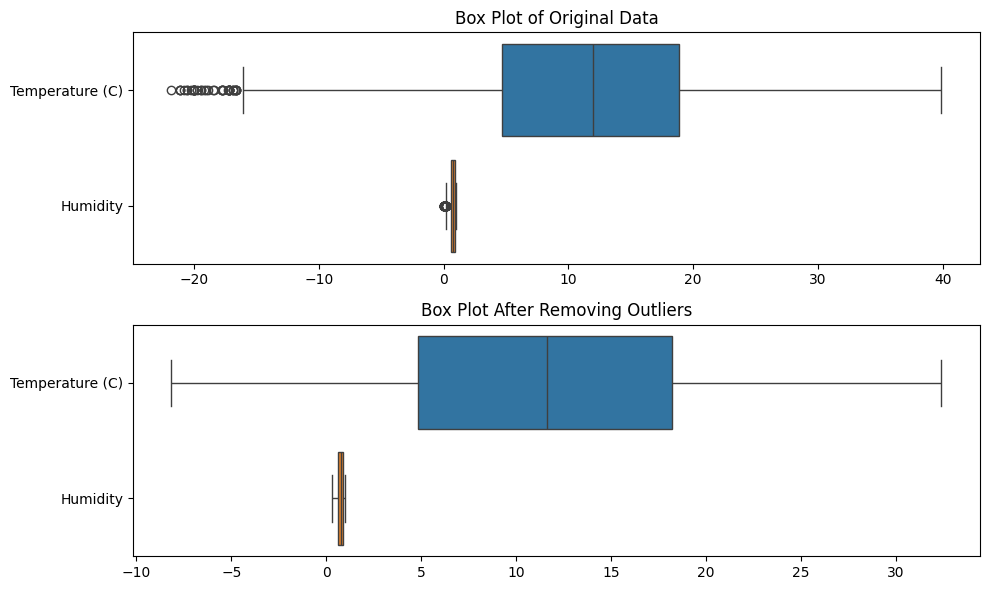

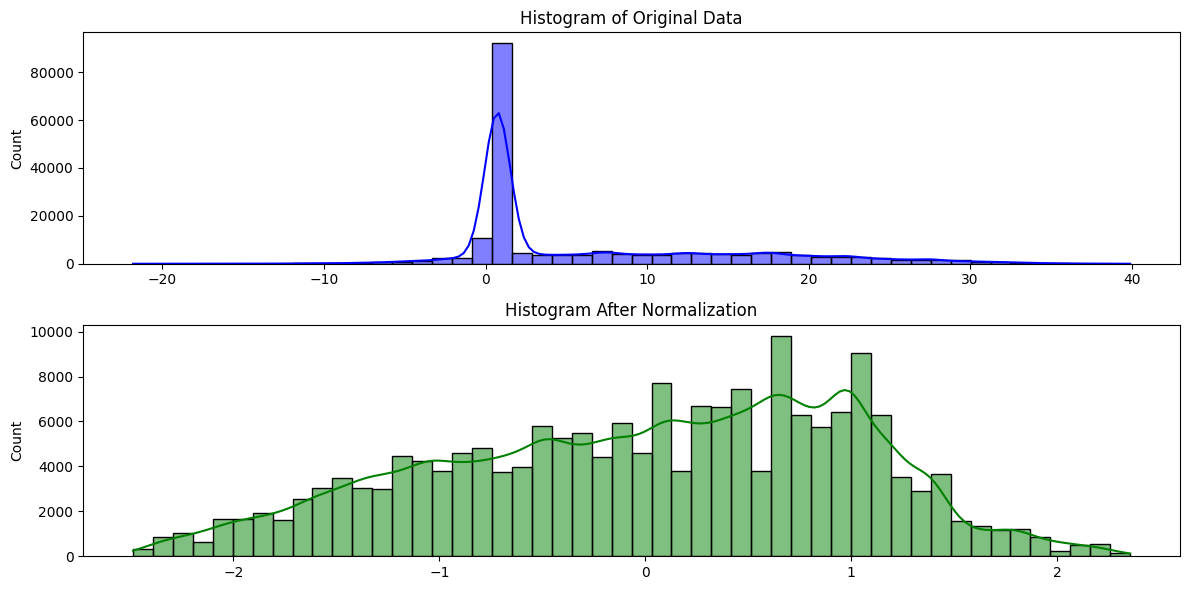

In [108]:
outlier_detector = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed
outliers = outlier_detector.fit_predict(data)
data_no_outliers = data[outliers == 1]  # Keep only the inliers

# Step 2: Normalize the data using StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_no_outliers)

# Step 3: Plot a box plot before and after removing outliers
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
sns.boxplot(data=data, orient='h')
plt.title('Box Plot of Original Data')

plt.subplot(2, 1, 2)
sns.boxplot(data=data_no_outliers, orient='h')
plt.title('Box Plot After Removing Outliers')

plt.tight_layout()
plt.show()

# Step 4: Plot a histogram before and after normalization
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
sns.histplot(data.values.flatten(), bins=50, kde=True, color='blue')
plt.title('Histogram of Original Data')

plt.subplot(2, 1, 2)
sns.histplot(data_normalized.flatten(), bins=50, kde=True, color='green')
plt.title('Histogram After Normalization')

plt.tight_layout()
plt.show()

In [182]:
X = data['Temperature (C)'].values.reshape(-1, 1)
y = data['Humidity'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

coef_linear = regression_model.coef_[0]
intercept_linear = regression_model.intercept_

# Print the linear regression equation
print(f'Linear Regression Equation: y = {coef_linear[0]:.2f} * x + {intercept_linear[0]:.2f}')


Mean Squared Error: 0.023186920487826057
Linear Regression Equation: y = -0.01 * x + 0.89


Linear Regression Equation: y = -0.01 * x + 0.89


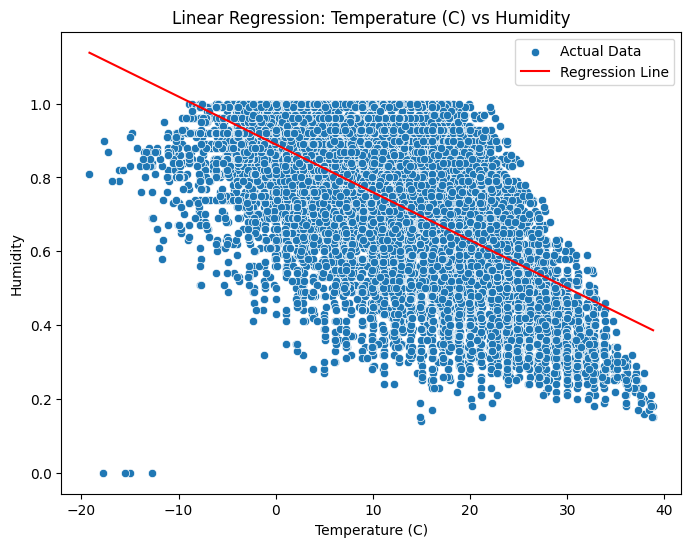

In [183]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), label='Actual Data')
sns.lineplot(x=X_test.flatten(), y=y_pred.flatten(), color='red', label='Regression Line')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('Linear Regression: Temperature (C) vs Humidity')
print(f'Linear Regression Equation: y = {coef_linear[0]:.2f} * x + {intercept_linear[0]:.2f}')
plt.legend()
plt.show()

In [181]:
X = data['Temperature (C)'].values.reshape(-1, 1)
y = data['Humidity'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)


mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error (Lasso): {mse_lasso}')

coef_lasso = lasso_model.coef_
intercept_lasso = lasso_model.intercept_


Mean Squared Error (Lasso): 0.02327248055887584


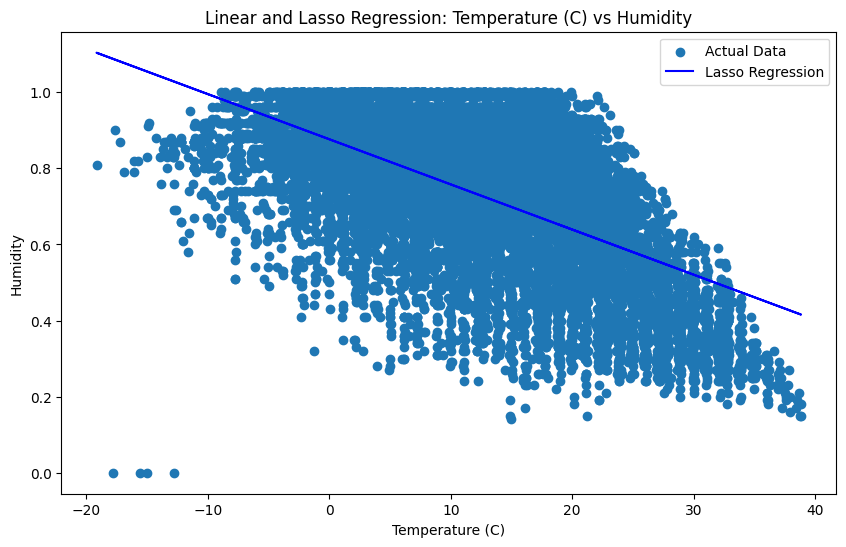

In [184]:
plt.figure(figsize=(10, 6))

# Plot the actual data points
plt.scatter(X_test.flatten(), y_test.flatten(), label='Actual Data')

# Plot the Lasso regression line
plt.plot(X_test.flatten(), y_pred_lasso.flatten(), color='blue', label='Lasso Regression')

plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('Linear and Lasso Regression: Temperature (C) vs Humidity')
plt.legend()
plt.show()

In [173]:
X = data['Temperature (C)'].values.reshape(-1, 1)
y = data['Humidity'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ridge_model = Ridge(alpha=0.8)
ridge_model.fit(X_train, y_train)


y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')

# Assuming you've already trained the Ridge regression model (ridge_model)

# Extract the coefficients
coef_ridge = ridge_model.coef_[0]
intercept_ridge = ridge_model.intercept_

# Print the Ridge regression equation
print(f'Ridge Regression Equation: y = {coef_ridge[0]:.2f} * x + {intercept_ridge[0]:.2f}')



Mean Squared Error (Ridge): 0.023186920453229943
Ridge Regression Equation: y = -0.01 * x + 0.89


Ridge Regression Equation: y = -0.01 * x + 0.89


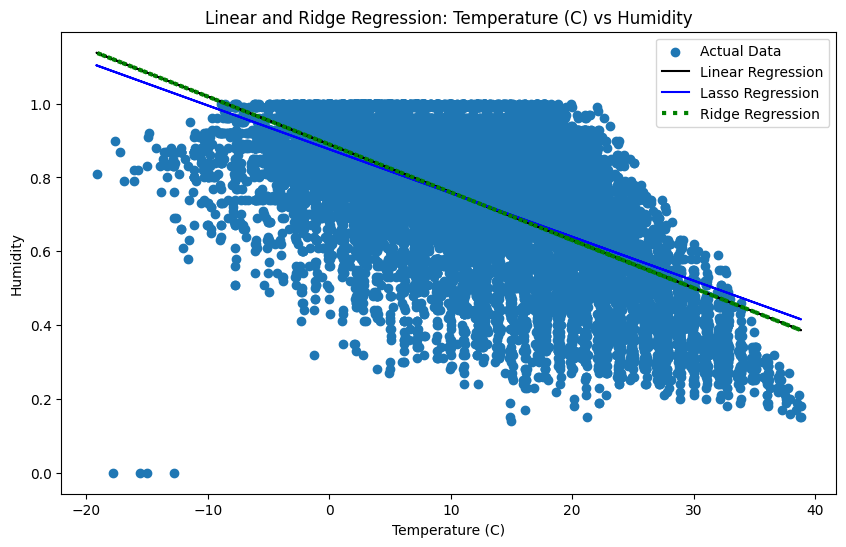

In [174]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test.flatten(), y_test.flatten(), label='Actual Data')

# Plot the linear regression line
plt.plot(X_test.flatten(), y_pred.flatten(), color='black',  label='Linear Regression')

# Plot the Lasso regression line
plt.plot(X_test.flatten(), y_pred_lasso.flatten(), color='blue', label='Lasso Regression')

plt.plot(X_test.flatten(), y_pred_ridge.flatten(), color='green', linestyle=':',linewidth=3, label='Ridge Regression')
print(f'Ridge Regression Equation: y = {coef_ridge[0]:.2f} * x + {intercept_ridge[0]:.2f}')

plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('Linear and Ridge Regression: Temperature (C) vs Humidity')
plt.legend()
plt.show()

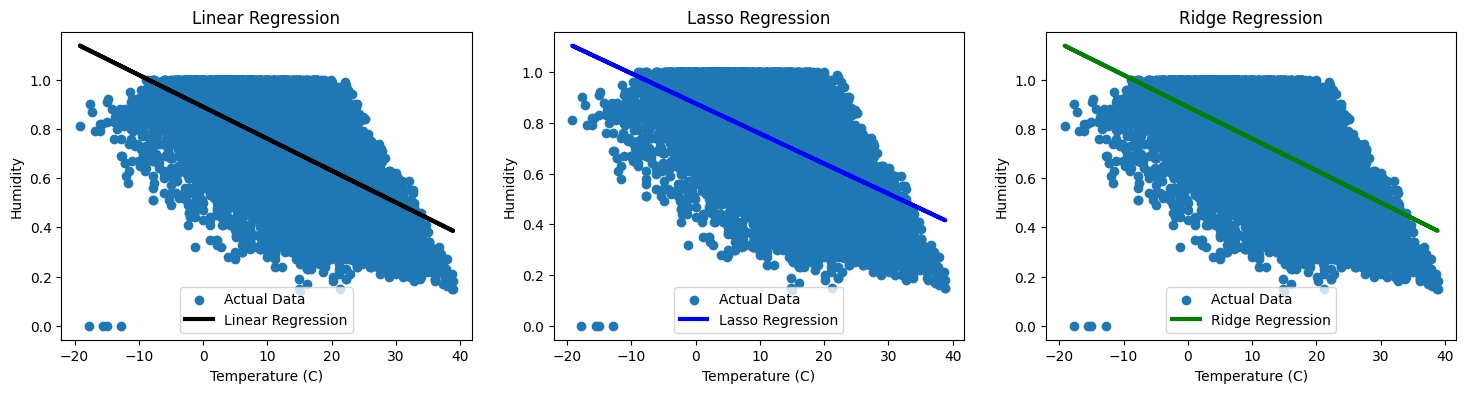

In [171]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].scatter(X_test.flatten(), y_test.flatten(), label='Actual Data')
axes[0].plot(X_test.flatten(), y_pred.flatten(), color='black',linewidth=3, label='Linear Regression')
axes[0].set_xlabel('Temperature (C)')
axes[0].set_ylabel('Humidity')
axes[0].set_title('Linear Regression')
axes[0].legend()

# Lasso Regression
axes[1].scatter(X_test.flatten(), y_test.flatten(), label='Actual Data')
axes[1].plot(X_test.flatten(), y_pred_lasso.flatten(), color='blue',linewidth=3, label='Lasso Regression')
axes[1].set_xlabel('Temperature (C)')
axes[1].set_ylabel('Humidity')
axes[1].set_title('Lasso Regression')
axes[1].legend()

# Ridge Regression
axes[2].scatter(X_test.flatten(), y_test.flatten(), label='Actual Data')
axes[2].plot(X_test.flatten(), y_pred_ridge.flatten(), color='green', linewidth=3, label='Ridge Regression')
axes[2].set_xlabel('Temperature (C)')
axes[2].set_ylabel('Humidity')
axes[2].set_title('Ridge Regression')
axes[2].legend()


plt.show()